In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import io 
import math
import pandas as pd


In [2]:
def show_channels(im, channel_names=None, colormap='gray'):

    plt.figure(figsize=(15, 4))

    for ch in range(3):

        plt.subplot(1, 3, ch+1)
        plt.imshow(im[:, :, ch], cmap=colormap, vmin=0, vmax=255)
        plt.axis('off')
        
        title = 'Channel {}'.format(ch+1)
        if channel_names is not None:
            title += ' ({})'.format(channel_names[ch])
        
        plt.title(title)
        
kernel = np.ones((11,11),np.uint8)

In [3]:
def threshold_binary(im, t):       
    _, im_t = cv2.threshold(im, t, 255, cv2.THRESH_BINARY)
    return im_t


def mask_threshold_range(im, thresh_min, thresh_max):
    binary_output = (im >= thresh_min) & (im < thresh_max)
    return np.uint8(binary_output)

def imshow(im, **kwargs):
    plt.imshow(im, **kwargs)
    plt.axis('off')
    plt.show()

    

def apply_mask(im, mask):

    return cv2.bitwise_and(im, im, mask=mask)


In [4]:

imgCard = cv2.imread("Cards.jpg")
# cv2.imshow("Cards", img)
imgGray = cv2.cvtColor(imgCard, cv2.COLOR_BGR2GRAY)

In [5]:
# cv2.imshow("Cards", imgGray)

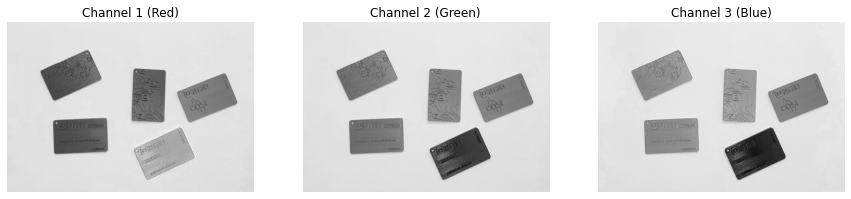

In [6]:
show_channels(imgCard, channel_names=['Red', 'Green', 'Blue'])

In [7]:
imgGreen = imgCard[:, :, 1]

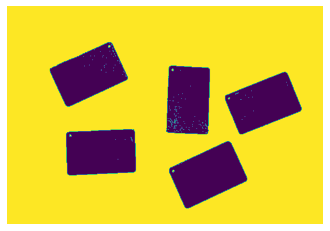

In [8]:
GreenMask_Card = threshold_binary(imgGreen, 150)

imshow(GreenMask_Card)


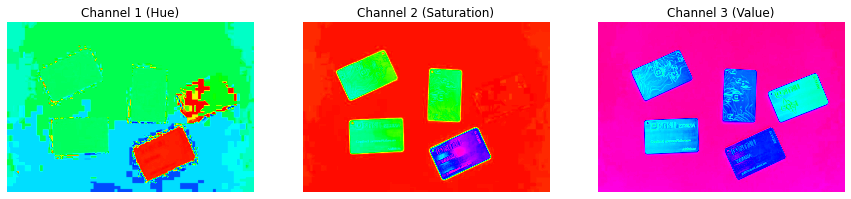

In [9]:
imgCard_hsv = cv2.cvtColor(imgCard, cv2.COLOR_RGB2HSV)

show_channels(imgCard_hsv, channel_names=['Hue', 'Saturation', 'Value'], colormap='hsv')

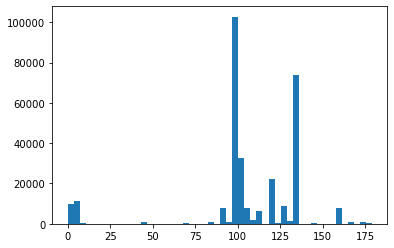

In [10]:
plt.hist(imgCard_hsv[:, :, 0].ravel(), bins=50)
plt.show()

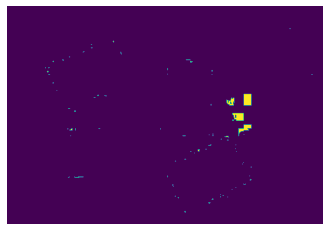

In [11]:
GreenMask_Card_hsv = mask_threshold_range(imgCard_hsv[:, :, 0], 35, 75)
imshow(GreenMask_Card_hsv)

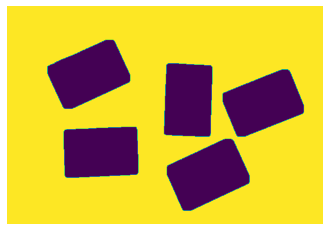

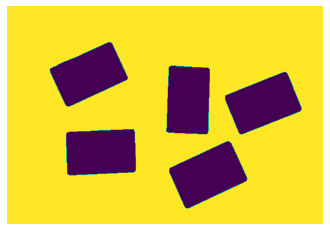

In [12]:
imgEroded = cv2.erode(GreenMask_Card,kernel,iterations=1)

imshow(imgEroded)

imgDilated = cv2.dilate(imgEroded, kernel, iterations=1)

imshow(imgDilated)


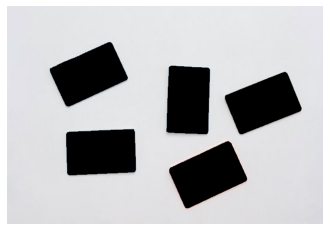

In [13]:
imgMasked = apply_mask(imgCard, imgDilated)

imshow(imgMasked)

In [14]:

def find_ccomp(im, *args, **kwargs):
   

    num, labels, stats, centroids = cv2.connectedComponentsWithStats(im, *args, **kwargs)
    
    stats_df = pd.DataFrame(stats, columns=['left', 'top', 'width', 'height', 'area'])
    stats_df['x'] = centroids[:,0]
    stats_df['y'] = centroids[:,1]
    
    return labels, stats_df

In [15]:
ccomp_labels, ccomp_stats = find_ccomp(imgDilated)

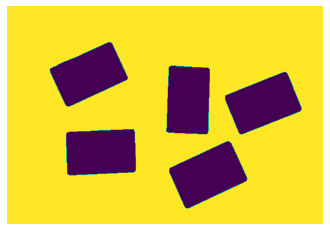

In [16]:
imshow(ccomp_labels)

In [17]:
ccomp_stats

,left,top,width,height,area,x,y
0,90,76,527,347,63429,339.925003,241.929401
1,0,0,662,456,238443,327.992824,223.661588


NameError: name 'viz' is not defined

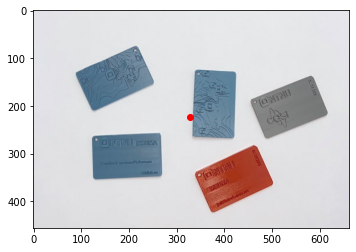

In [18]:
plt.imshow(imgCard)

# plot centroids
plt.scatter(ccomp_stats.iloc[1:].x, ccomp_stats.iloc[1:].y, color='red')

# plot bounding boxes
# skip first row
for idx in ccomp_stats.index[1:]:
    
    row = ccomp_stats.iloc[idx]
    
    viz.plot_bbox(row.left, row.top, row.width, row.height)
    
plt.show()

In [20]:
threshold_value = 150

imgCard > threshold_value

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,

In [21]:
plt.imshow(imgCard > threshold_value)
plt.show()

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>